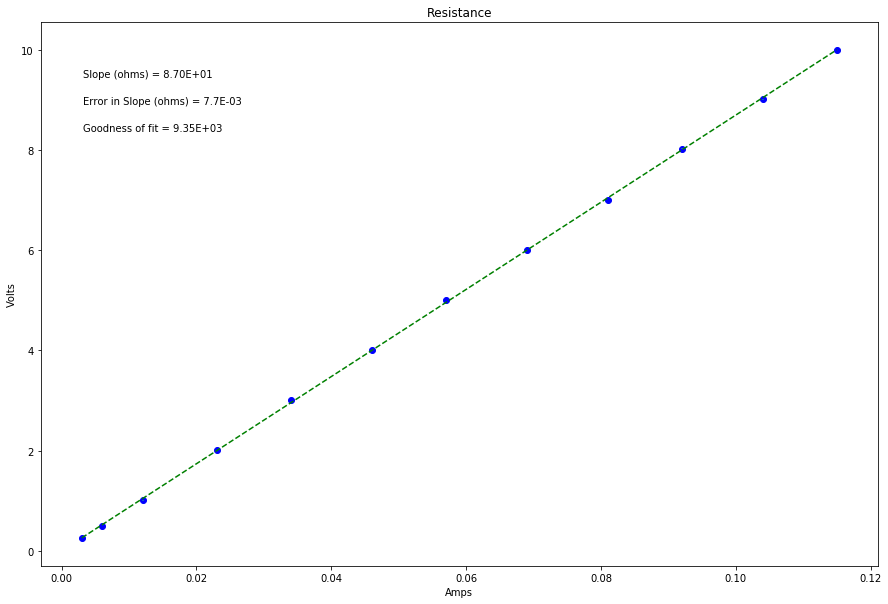

In [3]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def rule3(Aun, Bun):
    Qun = np.sqrt(Aun ** 2 + Bun ** 2)
    return Qun


def rule4(Q, Ae, Be, Aun, Bun, A, B):
    Qun = np.abs(Q) * np.sqrt(((Ae * Aun / A) ** 2) + ((Be * Bun / B) ** 2))
    return Qun


def rfromvi(V, I):
    R = (V / I)
    return R


def addohms(O):
    Ohms = (np.sum(O ** -1)) ** -1
    return Ohms


def ohmsbruteforce(A, Aun):
    ohmsun = np.abs(addohms(np.average(A)) - addohms(np.average(A) + Aun))
    return ohmsun

OMystery = 87.0
O24 = 24.0
O100 = 98.6

# Measurement Uncertainties (V=Volts, A=Amps)
V_un = .001
A_un = .001
O_un = .1

# Experimental Values Unknown Resistor

V1 = .251
A1 = .003
V2 = .499
A2 = .006
V3 = 1.003
A3 = .012
V4 = 2.004
A4 = .023
V5 = 3.005
A5 = .034
V6 = 4.003
A6 = .046
V7 = 4.997
A7 = .057
V8 = 5.998
A8 = .069
V9 = 7.01
A9 = .081
V10 = 8.030
A10 = .092
V11 = 9.01
A11 = .104
V12 = 10.00
A12 = .115

# Series Experimental Values

VTotal_S = 5.000
V24_S = .970
V100_S = 4.003
A24_S = .041
A100_S = .041

# Parallel Experimental Values
# Total Voltage = 5.122

V24_P = 4.884
V100_P = 5.065
A24_P = .210
A100_P = .050
V_array = np.array([V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12])
A_array = np.array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12])

x = A_array  # this should be the array you want to plot on the x axis
y = V_array
dy = np.array([V_un] * 12)  # this should be your error in y array

# ----------------------------------------------#
# Don't need to change anything in this section!

# Find the intercept and slope, b and m, from Python's polynomial fitting function
b, m = np.polynomial.polynomial.polyfit(x, y, 1, w=dy)

# Write the equation for the best fit line based on the slope and intercept
fit = b + m * x


# Calculate the error in slope and intercept
# def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1 / dy ** 2)) * (sum(x ** 2 / dy ** 2)) - (sum(x / dy ** 2)) ** 2
    return D


D = Delta(x, dy)

dm = np.sqrt(1 / D * sum(1 / dy ** 2))  # error in slope
db = np.sqrt(1 / D * sum(x ** 2 / dy ** 2))  # error in intercept


# Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x, y, dy):
    N = sum(((y - b - m * x) / dy) ** 2)
    return N


N = LLSFD2(x, y, dy)

# -----------------------------------------------------------------------#
# Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15, 10))

plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')

# create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Amps')
plt.ylabel('Volts')
plt.title('Resistance')

plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none")  # don't need to plot x error bars

plt.annotate('Slope (ohms) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')

plt.annotate('Error in Slope (ohms) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')

plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()